# Breast Ultrasound Malignancy Detection Using CNN

In this notebook we are going to see how we can load an image dataset, and apply CNN based classification on the dataset, in order to detect the malignancy of the breast ultrasound images.


For this we are going to use a Breast Ultrasound Image dataset, that contains some benign samples and some malignant samples. 

Dataset source:  Rodrigues, Paulo Sergio (2017), “Breast Ultrasound Image”, Mendeley Data, v1 http://dx.doi.org/10.17632/wmy84gzngw.1 

First, we connect the Google drive, where our data is located.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Next, we check if we can access the image files or not...

In [2]:
import os
benignDirs = os.listdir("/content/drive/My Drive/GUIST_Webinar_Files/Jupyter_Notebook_Codes/Data/BreastUS_Images/0")
malignantDirs = os.listdir("/content/drive/My Drive/GUIST_Webinar_Files/Jupyter_Notebook_Codes/Data/BreastUS_Images/1")
print(benignDirs)
print(malignantDirs)

['us38.bmp', 'us37.bmp', 'us36.bmp', 'us39.bmp', 'us40.bmp', 'us18.bmp', 'us17.bmp', 'us19.bmp', 'us16.bmp', 'us20.bmp', 'us27.bmp', 'us30.bmp', 'us29.bmp', 'us26.bmp', 'us28.bmp', 'us42.bmp', 'us41.bmp', 'us43.bmp', 'us44.bmp', 'us45.bmp', 'us65.bmp', 'us61.bmp', 'us64.bmp', 'us63.bmp', 'us62.bmp', 'us74.bmp', 'us73.bmp', 'us72.bmp', 'us71.bmp', 'us75.bmp', 'us100.bmp', 'us97.bmp', 'us98.bmp', 'us96.bmp', 'us99.bmp', 'us3.bmp', 'us1.bmp', 'us5.bmp', 'us2.bmp', 'us4.bmp', 'us10.bmp', 'us8.bmp', 'us9.bmp', 'us7.bmp', 'us6.bmp', 'us13.bmp', 'us12.bmp', 'us11.bmp', 'us14.bmp', 'us15.bmp', 'us24.bmp', 'us21.bmp', 'us25.bmp', 'us23.bmp', 'us22.bmp', 'us34.bmp', 'us35.bmp', 'us33.bmp', 'us32.bmp', 'us31.bmp', 'us49.bmp', 'us46.bmp', 'us48.bmp', 'us47.bmp', 'us50.bmp', 'us53.bmp', 'us51.bmp', 'us54.bmp', 'us55.bmp', 'us52.bmp', 'us58.bmp', 'us56.bmp', 'us59.bmp', 'us60.bmp', 'us57.bmp', 'us70.bmp', 'us67.bmp', 'us68.bmp', 'us69.bmp', 'us66.bmp', 'us77.bmp', 'us79.bmp', 'us76.bmp', 'us78.bmp',

In [3]:
# Check the number of positive and negative samples
print('Number of negative samples: ',len(benignDirs))
print('Number of positive samples: ',len(malignantDirs))

Number of negative samples:  100
Number of positive samples:  150


Now, we read the images and store inside lists...

In [4]:
import imageio

# Declare the lists where the images and labels are to be stored.
allImages = list()
allLabels = list()

# Get the benign images and create labels
for i in range(len(benignDirs)):
  allImages.append(imageio.imread('/content/drive/My Drive/BreastUS_Images/0/'+benignDirs[i]))
  allLabels.append(0)

# Get the malignant images and create labels
for i in range(len(malignantDirs)):
  allImages.append(imageio.imread('/content/drive/My Drive/BreastUS_Images/1/'+malignantDirs[i]))
  allLabels.append(1)

print(len(allImages))
print(len(allLabels))
print(allLabels)

250
250
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Now, let's check how the images are, in terms of shape..

In [5]:
for i in range(len(allImages)):
  print(allImages[i].shape)

(65, 105)
(65, 105)
(65, 105)
(65, 105)
(65, 105)
(87, 153)
(87, 153)
(87, 153)
(87, 153)
(87, 153)
(75, 95)
(75, 95)
(75, 95)
(75, 95)
(75, 95)
(79, 127)
(79, 127)
(79, 127)
(79, 127)
(79, 127)
(105, 157)
(105, 157)
(105, 157)
(105, 157)
(105, 157)
(73, 107)
(73, 107)
(73, 107)
(73, 107)
(73, 107)
(69, 95)
(69, 95)
(69, 95)
(69, 95)
(69, 95)
(75, 95)
(75, 95)
(75, 95)
(75, 95)
(75, 95)
(69, 123)
(69, 123)
(69, 123)
(69, 123)
(69, 123)
(79, 105)
(79, 105)
(79, 105)
(79, 105)
(79, 105)
(57, 93)
(57, 93)
(57, 93)
(57, 93)
(57, 93)
(73, 107)
(73, 107)
(73, 107)
(73, 107)
(73, 107)
(79, 93)
(79, 93)
(79, 93)
(79, 93)
(79, 93)
(75, 75)
(75, 75)
(75, 75)
(75, 75)
(75, 75)
(71, 99)
(71, 99)
(71, 99)
(71, 99)
(71, 99)
(75, 143)
(75, 143)
(75, 143)
(75, 143)
(75, 143)
(93, 121)
(93, 121)
(93, 121)
(93, 121)
(93, 121)
(77, 105)
(77, 105)
(77, 105)
(77, 105)
(77, 105)
(95, 97)
(95, 97)
(95, 97)
(95, 97)
(95, 97)
(81, 157)
(81, 157)
(81, 157)
(81, 157)
(81, 157)
(99, 177)
(91, 111)
(161, 199)
(91,

Now, we bring all the images to the same shape, and then flatten them...

In [6]:
# Import necessary packages
import cv2
import numpy as np

for i in range(len(allImages)):
  # Resize all the images into 64x64
  allImages[i] = cv2.resize(allImages[i], (64,64))

# Check the final dimensionality
for i in range(len(allImages)):
  print(allImages[i].shape)

(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(

In [7]:
print(list(allImages[0]))

[array([122,  91,  67,  50,  46,  42,  37,  54,  65,  66,  82,  81, 102,
       119, 119,  96,  73,  64,  47,  32,  32,  33,  38,  46,  65,  65,
        71,  64,  71,  72,  66,  75,  78,  69,  55,  52,  63,  66, 103,
       108,  82,  93,  90, 102, 106, 108, 113,  95,  81, 100, 122, 117,
       121, 123, 107, 103, 110,  89,  94,  86,  98,  97,  95,  27],
      dtype=uint8), array([103,  77,  53,  44,  47,  41,  43,  60,  72,  68,  82,  89, 106,
       107, 105,  86,  65,  58,  44,  28,  34,  39,  48,  63,  78,  72,
        68,  63,  70,  73,  75,  75,  71,  63,  59,  60,  70,  90, 117,
       115,  96,  95,  98, 107, 106, 111, 104,  90,  71,  95, 105, 116,
       116, 113, 107, 108, 103, 108, 107,  80,  83,  89,  87,  25],
      dtype=uint8), array([ 78,  71,  51,  47,  48,  50,  59,  63,  72,  73,  85,  91, 102,
        94,  82,  73,  50,  47,  32,  26,  41,  49,  53,  64,  70,  67,
        57,  52,  66,  74,  76,  65,  74,  74,  80,  69,  79,  95, 112,
       111, 116, 102, 104, 103,

In [8]:
# convert from integers to floats
allImages = np.array(allImages)

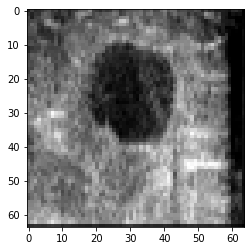

In [43]:
import matplotlib.pyplot as plt

plt.imshow(allImages[200], cmap = 'gray')

In [9]:
# Convert the integer values to float
allImages = allImages.astype('float32')

# Normalize to range 0-1
allImages = allImages / 255.0

print(allImages[0])

[[0.47843137 0.35686275 0.2627451  ... 0.38039216 0.37254903 0.10588235]
 [0.40392157 0.3019608  0.20784314 ... 0.34901962 0.34117648 0.09803922]
 [0.30588236 0.2784314  0.2        ... 0.30588236 0.32156864 0.10196079]
 ...
 [0.24313726 0.28235295 0.29411766 ... 0.32156864 0.2784314  0.10980392]
 [0.23921569 0.25882354 0.2784314  ... 0.32156864 0.28235295 0.12941177]
 [0.2509804  0.24313726 0.24313726 ... 0.3254902  0.3254902  0.10196079]]


In [10]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [11]:
# Prepare your data
from sklearn.model_selection import train_test_split

# 80-20 Split, in a stratified manner
xTrain, xTest, yTrain, yTest = train_test_split(allImages, allLabels, test_size=0.2, shuffle = True, stratify = allLabels)

print(xTrain.shape)
print(xTest.shape)

(200, 64, 64)
(50, 64, 64)


In [21]:
# Reshape the data into (number_of_samples, image_rows, image_cols, number_of_channels)
xTrain = xTrain.reshape(xTrain.shape[0], 64, 64, 1)
xTest = xTest.reshape(xTest.shape[0], 64, 64, 1)

In [19]:
# Convert the labels also into numpy arrays
yTrain = np.array(yTrain)
yTest = np.array(yTest)

In [30]:
import keras

# Set the channel ordering to Channels Last
keras.backend.set_image_data_format('channels_last')

# Define a simple CNN classification model

# First a series of Convolution + Pooling layers
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64,64,1)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((3, 3)))

# Then flatten, and a couple of FC Layers
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
# Define the SGD optimization function with momentum
opt = SGD(lr=0.001, momentum=0.9)

# Compile model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
# Specify Early Stopping criteria
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)

# Fit the model on the training data
model.fit(xTrain, yTrain, epochs=100, batch_size=16, validation_data=(xTest, yTest), verbose=1, callbacks=[es])

Epoch 1/100
13/13 [==============================] - 3s 252ms/step - loss: 0.6519 - accuracy: 0.6550 - val_loss: 0.6071 - val_accuracy: 0.8400
Epoch 2/100
13/13 [==============================] - 3s 240ms/step - loss: 0.6004 - accuracy: 0.6750 - val_loss: 0.5328 - val_accuracy: 0.9000
Epoch 3/100
13/13 [==============================] - 3s 234ms/step - loss: 0.5639 - accuracy: 0.7000 - val_loss: 0.4897 - val_accuracy: 0.7400
Epoch 4/100
13/13 [==============================] - 3s 232ms/step - loss: 0.4873 - accuracy: 0.8200 - val_loss: 0.3892 - val_accuracy: 0.9200
Epoch 5/100
13/13 [==============================] - 3s 232ms/step - loss: 0.4313 - accuracy: 0.8400 - val_loss: 0.3868 - val_accuracy: 0.9000
Epoch 6/100
13/13 [==============================] - 3s 236ms/step - loss: 0.3710 - accuracy: 0.8750 - val_loss: 0.2999 - val_accuracy: 0.8800
Epoch 7/100
13/13 [==============================] - 3s 243ms/step - loss: 0.3429 - accuracy: 0.8600 - val_loss: 0.2454 - val_accuracy: 0.9400

In [37]:
yPred = model.predict_classes(xTest).ravel()

print("yTest: ",yTest)
print("yPred: ",yPred)

from sklearn.metrics import classification_report

print(classification_report(yTest, yPred))

yTest:  [1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0
 0 1 0 1 1 1 1 1 1 1 1 1 1]
yPred:  [1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0
 0 1 0 1 1 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        30

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

